In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
df.shape

(891, 14)

In [27]:
df.isnull().sum()*100/df.shape[0]

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

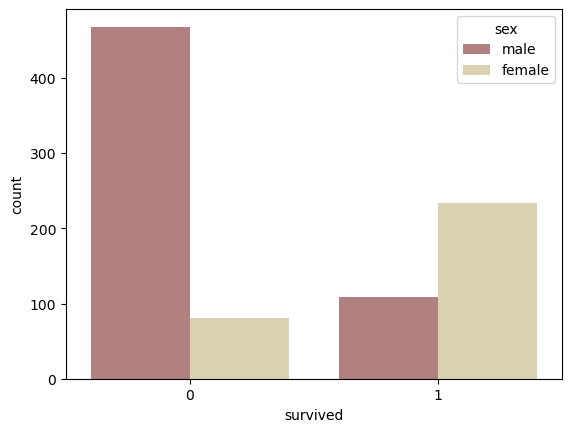

In [16]:
sns.countplot(x='survived',data=df,hue='sex',palette='pink')

In [17]:
df['survived'].value_counts() *100/len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

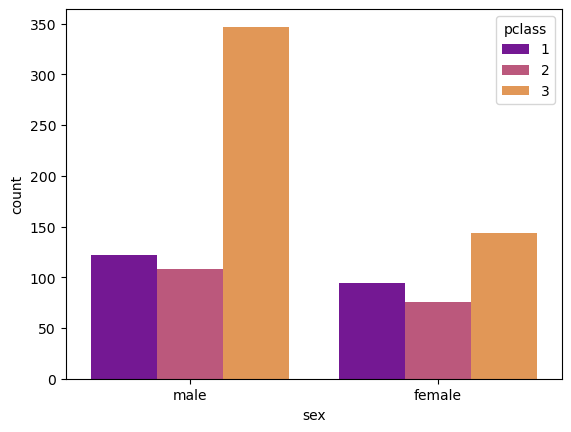

In [18]:
sns.countplot(x='sex',data=df,hue='pclass',palette='plasma')

In [28]:
df.dropna(subset=['embarked','embark_town'],inplace=True)


In [29]:
df.isnull().sum()*100/df.shape[0]

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.910011
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.390326
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [30]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [32]:
df=df.drop(['deck'],axis=1)

In [34]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [35]:
df.isnull().sum()*100/df.shape[0]

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.910011
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [36]:
# fill the null values of age with mean
df['age'].fillna(df['age'].mean(),inplace=True)
df.age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: age, Length: 889, dtype: float64

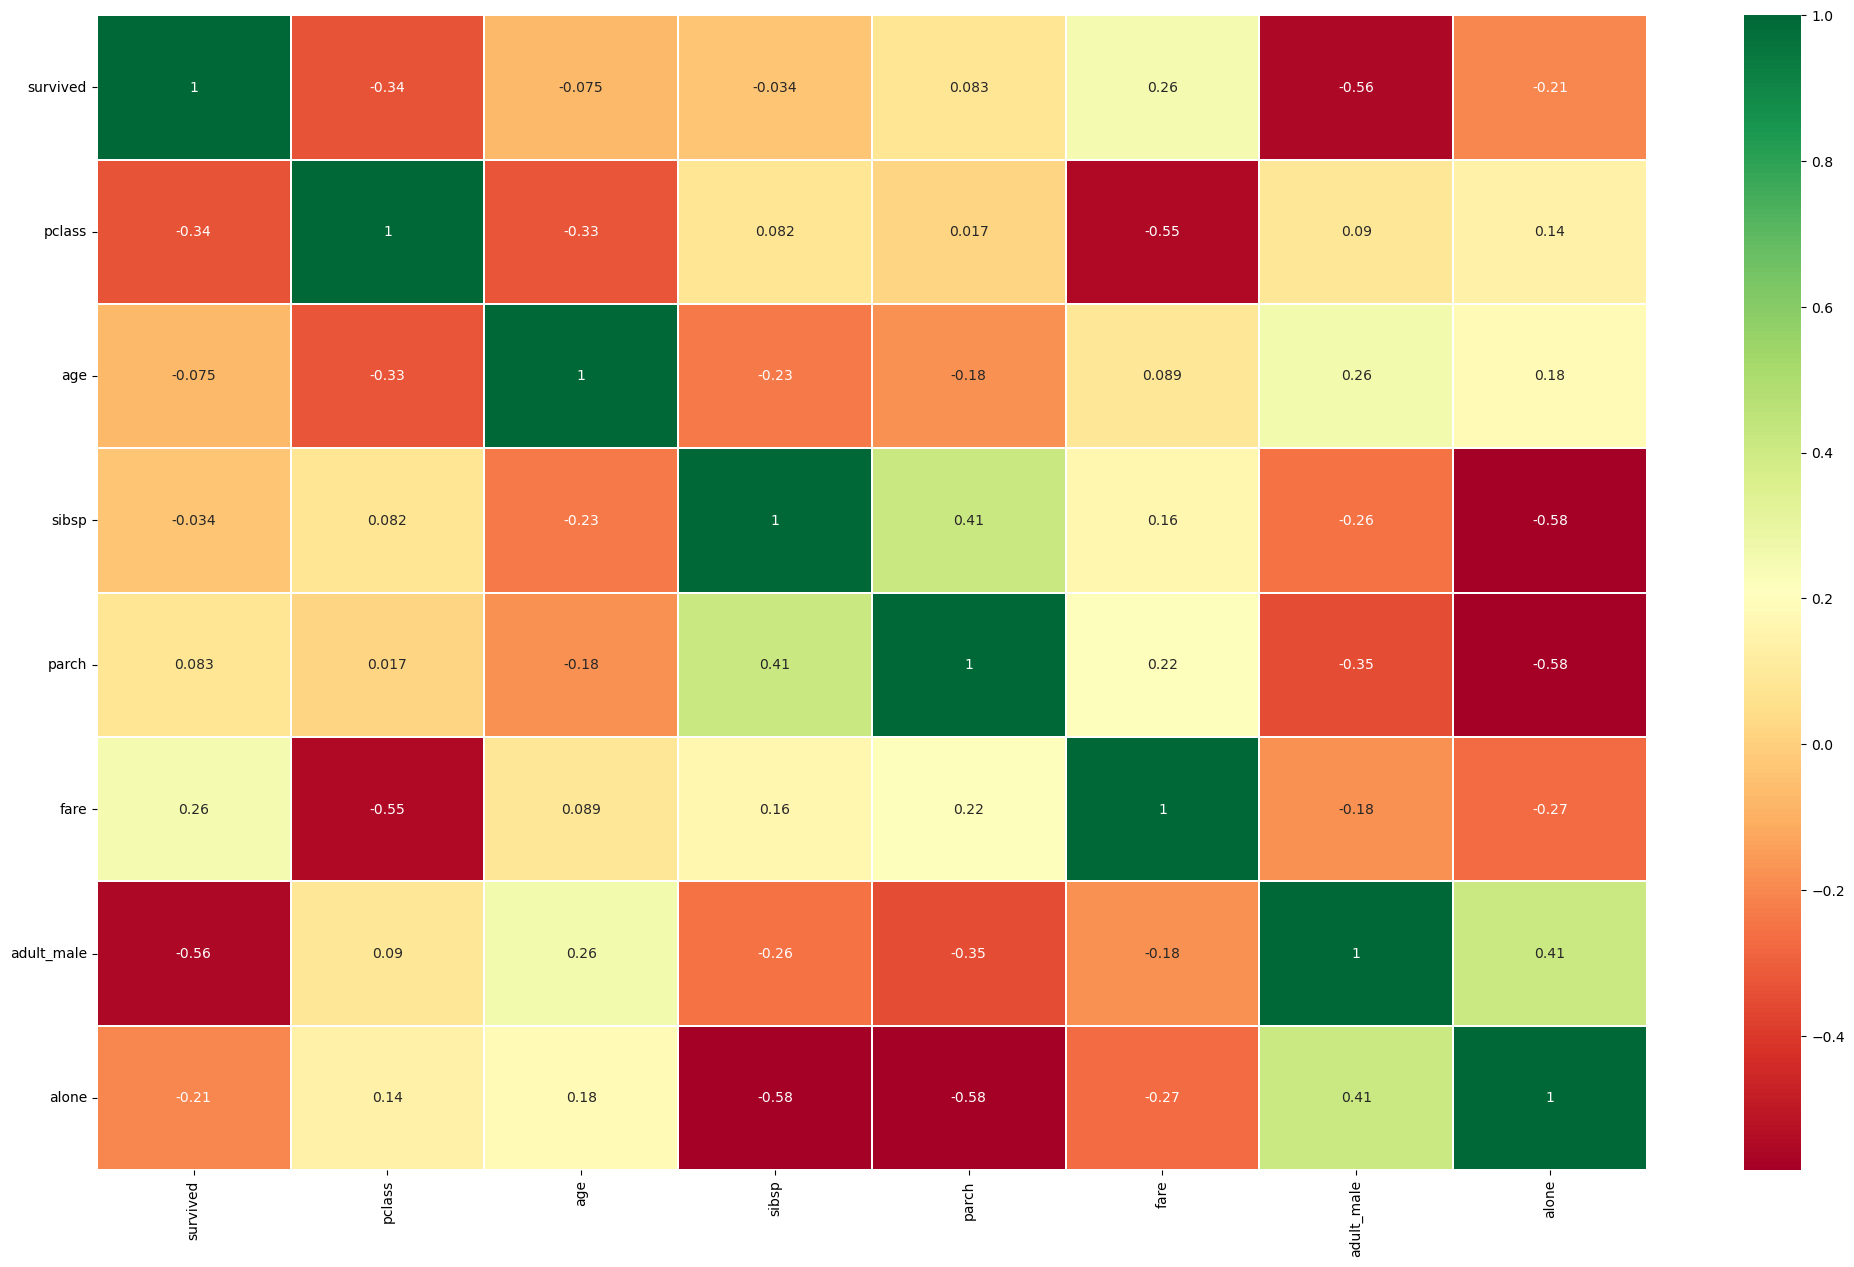

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry.

In [51]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])

df['sex'].unique()

array([1, 0], dtype=int64)

In [59]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['embarked']= label_encoder.fit_transform(df['embarked'])

df['embarked'].unique()

array([2, 0, 1])

In [66]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['embark_town']= label_encoder.fit_transform(df['embark_town'])

df['embark_town'].unique()

array([2, 0, 1], dtype=int64)

In [74]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])

df['class'].unique()

array([2, 0, 1])

In [81]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['who']= label_encoder.fit_transform(df['who'])

df['who'].unique()


array([1, 2, 0])

In [82]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['adult_male']= label_encoder.fit_transform(df['adult_male'])

df['adult_male'].unique()

array([1, 0], dtype=int64)

In [88]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['alive']= label_encoder.fit_transform(df['alive'])

df['alive'].unique()

array([0, 1])

In [89]:
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['alone']= label_encoder.fit_transform(df['alone'])

df['alone'].unique()

array([0, 1], dtype=int64)

In [91]:
# Defining features and labels
X=df.drop(['survived'],axis=1)
y=df['survived']

In [92]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [93]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [94]:
# STEP-4 Spliting the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
# shape of training and testing dataset

print("The shape of X training data :",X_train.shape)
print("The shape of y training data :",y_train.shape)
print("The shape of X test data :",X_test.shape)
print("The shape of y test data :",y_test.shape)

The shape of X training data : (711, 13)
The shape of y training data : (711,)
The shape of X test data : (178, 13)
The shape of y test data : (178,)


In [97]:
# Creating the model and fit it
logmodel = LogisticRegression().fit(X_train,y_train)
logmodel

LogisticRegression()

Now Let's Check Prediction Score as well as Number of Survived and Not Survived People.

In [100]:
print(logmodel.score(X_test,y_test))
pv = logmodel.predict(X_test)
print("Survived", sum(pv!=0))
print("NOT Survived", sum(pv==0))

1.0
Survived 73
NOT Survived 105


# Confusion Matrix
Use Confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

array([[105,   0],
       [  0,  73]], dtype=int64)

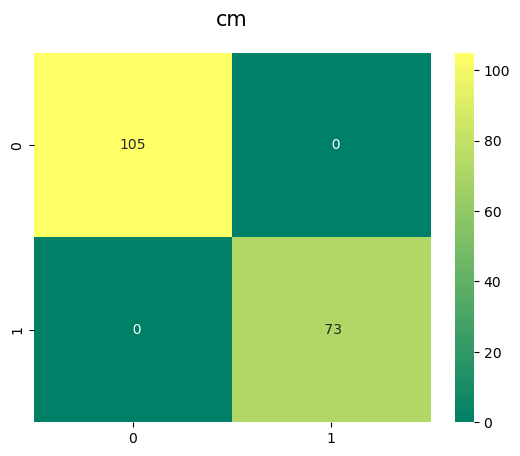

In [101]:
cm = confusion_matrix(y_test,pv)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pv),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

# Accuracy

In [102]:
prediction_lr=logmodel.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 100.0


# Cross-Validation Score

In [104]:
result_lr=cross_val_score(logmodel,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

The cross validated score for Logistic Regression is: 100.0
